# Extract Trees Structure

In [21]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sys.path.append("../../python-package")

In [4]:
import lightgbm as lgb

In [7]:
model = lgb.Booster(model_file='LightGBM_model.txt')

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_tree.html

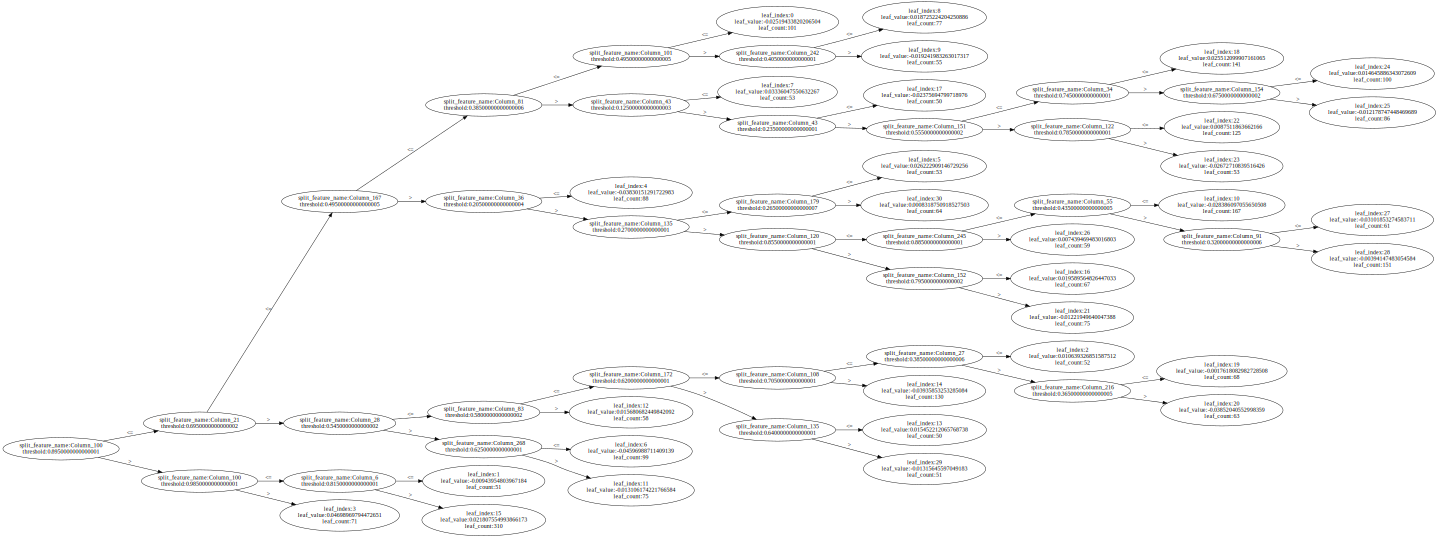

In [61]:
lgb.create_tree_digraph(model, tree_index=0, show_info='leaf_count', graph_attr={"rankdir":'LR', "size":"20,12"})

In [9]:
tree_struct = model.dump_model()["tree_info"]

number of trees:

In [62]:
len(tree_struct)

100

## Examine one tree.

https://lightgbm.readthedocs.io/en/latest/R/reference/lgb.model.dt.tree.html

In [14]:
tree1=tree_struct[0]
tree1.keys()

dict_keys(['tree_index', 'num_leaves', 'num_cat', 'shrinkage', 'tree_structure'])

In [18]:
tree1['tree_index'], tree1['num_leaves'], tree1['num_cat'], tree1['shrinkage']

(0, 31, 0, 0.1)

In [22]:
np.unique([el['shrinkage'] for el in tree_struct])


array([0.1])

> Shrinkage same for all trees, not needed then. Looks like its the default learning rate `learning_rate`

### Extract Tree Structure

Relevant:
* `split_index`: ID of a node in a tree (integer)
* `split_feature`: for a node, it's a feature name (character); for a leaf, it simply labels it as "NA"
* `threshold`: threshold: Splitting threshold value of a node
* `left_child`: child tree
* `right_child`: child tree
* `decision_type`: decision_type: Decision type of a node: Its always the same ( '<=' maps to 2) except for missing values and categorical features (according to https://github.com/microsoft/LightGBM/issues/2234). I will not use any of them.


Non-relevant:
* `missing_direction`: for missing values, not relevant
* `default_left`: if missing left
* `internal_value`: Node value
* `internal_count`: The number of observation collected by a node
* `split_gain`: split gain


` node['missing_direction'] = 'left' if tree['default_left'] else 'right'` from https://lightgbm.readthedocs.io/en/latest/_modules/lightgbm/basic.html?highlight=default_left

In [23]:
tree1['tree_structure'].keys()

dict_keys(['split_index', 'split_feature', 'split_gain', 'threshold', 'decision_type', 'default_left', 'missing_type', 'internal_value', 'internal_count', 'left_child', 'right_child'])

In [30]:
for el in list(tree1['tree_structure'].keys())[:-2]:
    print(el)
    print(tree1['tree_structure'][el])


split_index
0
split_feature
100
split_gain
25.39349937438965
threshold
0.8950000000000001
decision_type
<=
default_left
True
missing_type
None
internal_value
0
internal_count
2704


> One should be able to extract the trees as I did for xgboost.

In [32]:
tree1['tree_structure']['left_child']

{'split_index': 1,
 'split_feature': 21,
 'split_gain': 6.74576997756958,
 'threshold': 0.6950000000000002,
 'decision_type': '<=',
 'default_left': True,
 'missing_type': 'None',
 'internal_value': -0.0562883,
 'internal_count': 2272,
 'left_child': {'split_index': 3,
  'split_feature': 167,
  'split_gain': 4.328350067138672,
  'threshold': 0.49500000000000005,
  'decision_type': '<=',
  'default_left': True,
  'missing_type': 'None',
  'internal_value': -0.00995922,
  'internal_count': 1626,
  'left_child': {'split_index': 6,
   'split_feature': 81,
   'split_gain': 2.9045400619506836,
   'threshold': 0.38500000000000006,
   'decision_type': '<=',
   'default_left': True,
   'missing_type': 'None',
   'internal_value': 0.0514627,
   'internal_count': 841,
   'left_child': {'split_index': 7,
    'split_feature': 101,
    'split_gain': 2.901240110397339,
    'threshold': 0.49500000000000005,
    'decision_type': '<=',
    'default_left': True,
    'missing_type': 'None',
    'internal_